## InceptionV3

* **Goal:** Fine-tune InceptionV3 on an ImageFolder dataset; report metrics and save best model.

* **Data:** Assumes images are already 299×299; uses ImageNet mean/std normalization.

* **Split:** Stratified 80/10/10 (train/val/test) to preserve class balance.

* **Model:** torchvision.models.inception_v3(aux_logits=True); replaces main and aux heads with num_classes.

* **Train:** Adam (lr=1e-4), AMP (autocast + GradScaler), ReduceLROnPlateau on val accuracy.

* **Tweak quickly:** Change DATA_ROOT, adjust EPOCHS/LR/BATCH_SIZE; uncomment Resize if images aren’t 299×299.

Device: cuda
Classes: ['ARMD', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Train: 3782 | Val: 473 | Test: 473


Epoch 1/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.24s/it]


✅ Epoch 1: train_acc=0.8252 val_acc=0.9006 | train_loss=0.6443 val_loss=0.2605
💾 Saved best model → checkpoints\inceptionv3_best.pth


Epoch 2/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.22s/it]


✅ Epoch 2: train_acc=0.9432 val_acc=0.9239 | train_loss=0.2243 val_loss=0.2399
💾 Saved best model → checkpoints\inceptionv3_best.pth


Epoch 3/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.16s/it]


✅ Epoch 3: train_acc=0.9712 val_acc=0.9070 | train_loss=0.1168 val_loss=0.2592


Epoch 4/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.17s/it]


✅ Epoch 4: train_acc=0.9820 val_acc=0.9006 | train_loss=0.0756 val_loss=0.3370


Epoch 5/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.14s/it]


✅ Epoch 5: train_acc=0.9892 val_acc=0.9133 | train_loss=0.0548 val_loss=0.3125


Epoch 6/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.15s/it]


✅ Epoch 6: train_acc=0.9955 val_acc=0.9175 | train_loss=0.0301 val_loss=0.3307


Epoch 7/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.09s/it]


✅ Epoch 7: train_acc=0.9974 val_acc=0.9239 | train_loss=0.0141 val_loss=0.3346


Epoch 8/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.10s/it]


✅ Epoch 8: train_acc=0.9979 val_acc=0.9260 | train_loss=0.0100 val_loss=0.3278
💾 Saved best model → checkpoints\inceptionv3_best.pth


Epoch 9/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.10s/it]


✅ Epoch 9: train_acc=0.9987 val_acc=0.9302 | train_loss=0.0068 val_loss=0.3439
💾 Saved best model → checkpoints\inceptionv3_best.pth


Epoch 10/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.09s/it]


✅ Epoch 10: train_acc=0.9992 val_acc=0.9260 | train_loss=0.0052 val_loss=0.3517


Epoch 11/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.10s/it]


✅ Epoch 11: train_acc=0.9979 val_acc=0.9323 | train_loss=0.0081 val_loss=0.3384
💾 Saved best model → checkpoints\inceptionv3_best.pth


Epoch 12/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.08s/it]


✅ Epoch 12: train_acc=0.9976 val_acc=0.9281 | train_loss=0.0117 val_loss=0.3447

=== TEST EVALUATION (InceptionV3) ===


Test: 100%|████████████████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.09s/it]



Classification Report (Test):
                      precision    recall  f1-score   support

                ARMD     1.0000    1.0000    1.0000        51
            cataract     0.9000    0.9519    0.9252       104
diabetic_retinopathy     1.0000    1.0000    1.0000       110
            glaucoma     0.9512    0.7723    0.8525       101
              normal     0.8500    0.9533    0.8987       107

            accuracy                         0.9302       473
           macro avg     0.9402    0.9355    0.9353       473
        weighted avg     0.9337    0.9302    0.9291       473



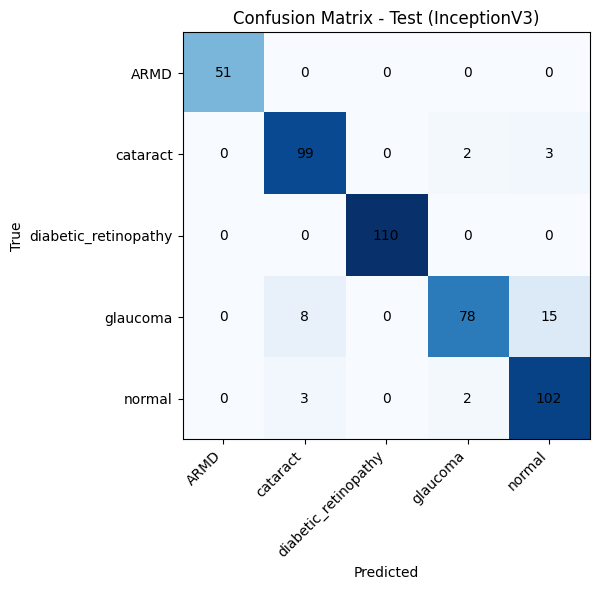


AUC (macro-OVR):    0.9904
AUC (weighted-OVR): 0.9895
AUC (micro-OVR):    0.9919


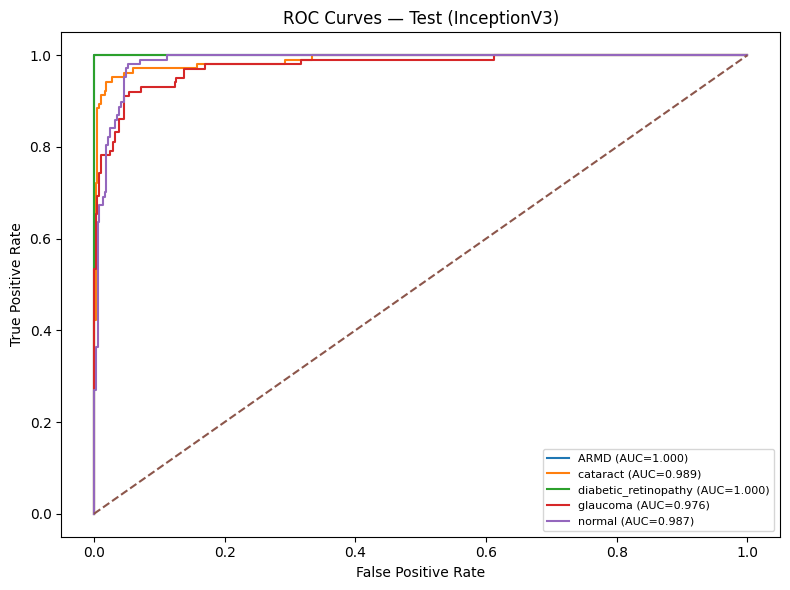

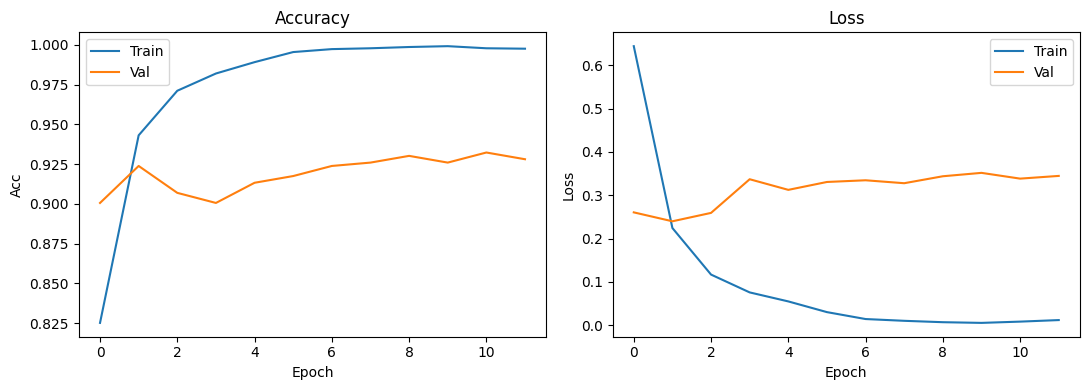

In [1]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import models, transforms, datasets

# ========= CONFIG =========
DATA_ROOT   = r"preprocessed299_inception"  # <-- change to your 299x299 preprocessed root
BATCH_SIZE  = 32
EPOCHS      = 12
LR          = 1e-4
NUM_WORKERS = 2
SAVE_DIR    = "checkpoints"
SEED        = 42
# ==========================

os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Repro
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# ---- Dataset & transforms (already 299x299) ----
norm_tfms = transforms.Compose([
    # If your data isn't 299 yet, uncomment the next line:
    # transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

base_ds = datasets.ImageFolder(root=DATA_ROOT, transform=norm_tfms)
num_classes = len(base_ds.classes)
print("Classes:", base_ds.classes)

targets = np.array(base_ds.targets)
indices = np.arange(len(base_ds))

# ---- 80/10/10 split (stratified) ----
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)   # 80/20
train_idx, temp_idx = next(sss1.split(indices, targets))
temp_targets = targets[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=SEED)   # 10/10 from temp
val_rel, test_rel = next(sss2.split(np.arange(len(temp_idx)), temp_targets))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

train_ds = Subset(base_ds, train_idx)
val_ds   = Subset(base_ds, val_idx)
test_ds  = Subset(base_ds, test_idx)

pin = torch.cuda.is_available()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")

# ---- Model: InceptionV3 (with aux logits) ----
def get_inception_v3(num_classes):
    model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT, aux_logits=True)
    # replace final FC
    in_feats = model.fc.in_features
    model.fc = nn.Linear(in_feats, num_classes)
    # replace aux classifier head too
    if model.aux_logits and model.AuxLogits is not None:
        aux_in = model.AuxLogits.fc.in_features
        model.AuxLogits.fc = nn.Linear(aux_in, num_classes)
    return model

model = get_inception_v3(num_classes).to(device)

# ---- Loss / Optim / Sched / AMP ----
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2)
scaler = torch.amp.GradScaler("cuda", enabled=torch.cuda.is_available())

# ---- Train ----
best_val_acc = 0.0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

for epoch in range(1, EPOCHS+1):
    # train
    model.train()  # aux logits active in training
    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [Train]"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            out = model(imgs)  # In training returns InceptionOutputs(logits, aux_logits)
            if hasattr(out, "logits"):
                logits = out.logits
                aux = out.aux_logits
            else:
                logits, aux = out, None
            loss = criterion(logits, labels)
            if aux is not None:
                loss = loss + 0.4 * criterion(aux, labels)  # standard aux loss weight

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / max(1, len(train_loader))
    train_acc  = correct / max(1, total)

    # validate
    model.eval()  # aux logits not used in eval forward
    v_loss, v_correct, v_total = 0.0, 0, 0
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [Val]"):
            imgs, labels = imgs.to(device), labels.to(device)
            with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
                out = model(imgs)
                logits = out.logits if hasattr(out, "logits") else out
                loss = criterion(logits, labels)
                probs = torch.softmax(logits, dim=1)

            v_loss += loss.item()
            preds = logits.argmax(1)
            v_correct += (preds == labels).sum().item()
            v_total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = v_correct / max(1, v_total)

    history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc);   history["val_acc"].append(val_acc)

    print(f"✅ Epoch {epoch}: train_acc={train_acc:.4f} val_acc={val_acc:.4f} | "
          f"train_loss={train_loss:.4f} val_loss={val_loss:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        ckpt_path = os.path.join(SAVE_DIR, "inceptionv3_best.pth")
        torch.save({
            "model_state": model.state_dict(),
            "val_acc": best_val_acc,
            "epoch": epoch,
            "classes": base_ds.classes
        }, ckpt_path)
        print(f"💾 Saved best model → {ckpt_path}")

# ---- Final Test Evaluation ----
print("\n=== TEST EVALUATION (InceptionV3) ===")
model.eval()
test_preds, test_labels, test_probs = [], [], []
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test"):
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            out = model(imgs)
            logits = out.logits if hasattr(out, "logits") else out
            probs = torch.softmax(logits, dim=1)
        preds = logits.argmax(1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

print("\nClassification Report (Test):")
print(classification_report(test_labels, test_preds, digits=4, target_names=base_ds.classes))

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Test (InceptionV3)")
plt.xlabel("Predicted"); plt.ylabel("True")
for (i,j),v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xticks(ticks=np.arange(num_classes), labels=base_ds.classes, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=base_ds.classes)
plt.tight_layout(); plt.show()

# ---- AUC + ROC ----
classes = list(range(num_classes))
y_true_bin = label_binarize(np.array(test_labels), classes=classes)
y_score = np.array(test_probs)
present_classes = np.unique(test_labels)
present_mask = np.isin(classes, present_classes)

def safe_auc(y_true, y_score, **kwargs):
    try:
        return roc_auc_score(y_true, y_score, **kwargs)
    except ValueError:
        return float("nan")

print(f"\nAUC (macro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='macro',    multi_class='ovr'):.4f}")
print(f"AUC (weighted-OVR): {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='weighted', multi_class='ovr'):.4f}")
print(f"AUC (micro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='micro',    multi_class='ovr'):.4f}")

plt.figure(figsize=(8,6))
for c in present_classes:
    fpr, tpr, _ = roc_curve(y_true_bin[:, c], y_score[:, c])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{base_ds.classes[c]} (AUC={class_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curves — Test (InceptionV3)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# ---- Train/Val curves ----
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history["train_acc"], label="Train")
plt.plot(history["val_acc"],   label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"],   label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()


## InceptionResnetV2


- **Goal:** Fine-tune `inception_resnet_v2` (timm) on 299×299 `ImageFolder` data.
- **Split:** Stratified **80/10/10** (train/val/test), no oversampling.
- **Model:** `timm.create_model("inception_resnet_v2", pretrained=True, num_classes=K)`.
- **Train:** CrossEntropy + **Adam (1e-4)**, **AMP** enabled, `ReduceLROnPlateau` on **val acc**.
- **Checkpoint:** Best by val acc → `checkpoints/inception_resnet_v2_best.pth` (weights, epoch, classes).
- **Evaluate:** `classification_report`, **confusion matrix**, **ROC per class**, **AUC** (macro/weighted/micro) with safe handling for missing classes.
- **Plots:** Confusion matrix, ROC curves, train/val **accuracy** & **loss**.


Device: cuda
Classes: ['ARMD', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Train: 3782 | Val: 473 | Test: 473


Epoch 1/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.25s/it]


✅ Epoch 1: train_acc=0.8395 val_acc=0.9006 | train_loss=0.4444 val_loss=0.2508
💾 Saved best model → checkpoints\inception_resnet_v2_best.pth


Epoch 2/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.43s/it]


✅ Epoch 2: train_acc=0.9397 val_acc=0.9366 | train_loss=0.1712 val_loss=0.1818
💾 Saved best model → checkpoints\inception_resnet_v2_best.pth


Epoch 3/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]


✅ Epoch 3: train_acc=0.9773 val_acc=0.9027 | train_loss=0.0754 val_loss=0.3325


Epoch 4/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.40s/it]


✅ Epoch 4: train_acc=0.9857 val_acc=0.9049 | train_loss=0.0495 val_loss=0.2916


Epoch 5/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]


✅ Epoch 5: train_acc=0.9870 val_acc=0.9218 | train_loss=0.0486 val_loss=0.2990


Epoch 6/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.43s/it]


✅ Epoch 6: train_acc=0.9958 val_acc=0.9218 | train_loss=0.0164 val_loss=0.2684


Epoch 7/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.42s/it]


✅ Epoch 7: train_acc=0.9987 val_acc=0.9345 | train_loss=0.0090 val_loss=0.2706


Epoch 8/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.43s/it]


✅ Epoch 8: train_acc=0.9958 val_acc=0.9260 | train_loss=0.0173 val_loss=0.2766


Epoch 9/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.42s/it]


✅ Epoch 9: train_acc=0.9992 val_acc=0.9260 | train_loss=0.0054 val_loss=0.2683


Epoch 10/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]


✅ Epoch 10: train_acc=0.9989 val_acc=0.9302 | train_loss=0.0057 val_loss=0.2900


Epoch 11/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:22<00:00,  1.49s/it]


✅ Epoch 11: train_acc=0.9958 val_acc=0.9345 | train_loss=0.0306 val_loss=0.3209


Epoch 12/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:22<00:00,  1.53s/it]


✅ Epoch 12: train_acc=0.9992 val_acc=0.9302 | train_loss=0.0065 val_loss=0.3099

=== TEST EVALUATION (Inception-ResNet-v2) ===


Test: 100%|████████████████████████████████████████████████████████████████████████████| 15/15 [00:22<00:00,  1.52s/it]



Classification Report (Test):
                      precision    recall  f1-score   support

                ARMD     0.9808    1.0000    0.9903        51
            cataract     0.9604    0.9327    0.9463       104
diabetic_retinopathy     1.0000    1.0000    1.0000       110
            glaucoma     0.8878    0.8614    0.8744       101
              normal     0.8929    0.9346    0.9132       107

            accuracy                         0.9408       473
           macro avg     0.9444    0.9457    0.9448       473
        weighted avg     0.9410    0.9408    0.9407       473



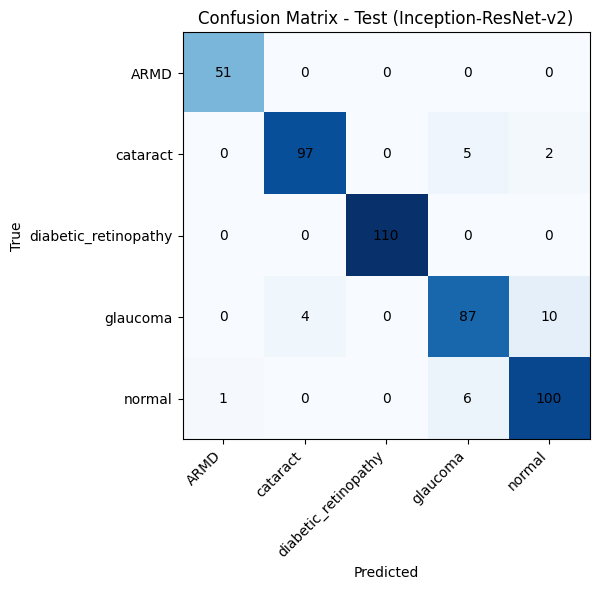


AUC (macro-OVR):    0.9910
AUC (weighted-OVR): 0.9901
AUC (micro-OVR):    0.9936


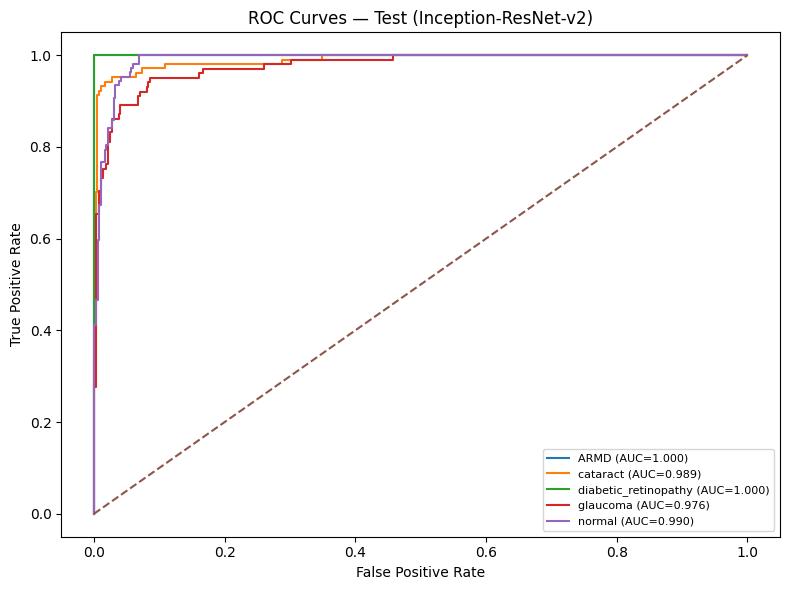

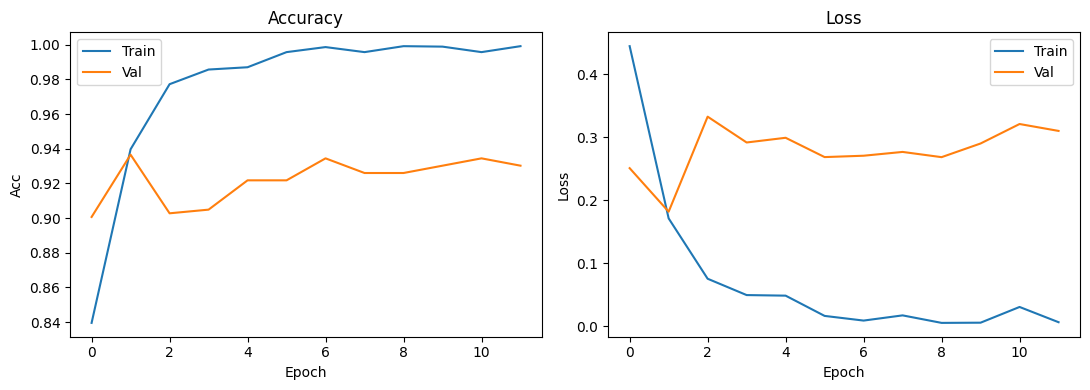

In [2]:
# Inception-ResNet-v2 (timm) — 80/10/10 split, no oversampling, AUC + plots
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms, datasets

# ========= CONFIG =========
DATA_ROOT   = r"preprocessed299_inception"   # 299×299 preprocessed folder (class subfolders)
BATCH_SIZE  = 32
EPOCHS      = 12
LR          = 1e-4
NUM_WORKERS = 2
SAVE_DIR    = "checkpoints"
CKPT_NAME   = "inception_resnet_v2_best.pth"
SEED        = 42
# ==========================

# --- deps ---
try:
    import timm
except Exception as e:
    raise RuntimeError("timm is required. Install with: pip install timm") from e

os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Repro
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# ---- Dataset & transforms (already 299×299) ----
norm_tfms = transforms.Compose([
    # If your images aren't 299 yet, add: transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
base_ds = datasets.ImageFolder(root=DATA_ROOT, transform=norm_tfms)
num_classes = len(base_ds.classes)
print("Classes:", base_ds.classes)

targets = np.array(base_ds.targets)
indices = np.arange(len(base_ds))

# ---- 80/10/10 split (stratified) ----
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)  # 80/20
train_idx, temp_idx = next(sss1.split(indices, targets))
temp_targets = targets[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=SEED)  # 10/10 from temp
val_rel, test_rel = next(sss2.split(np.arange(len(temp_idx)), temp_targets))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

train_ds = Subset(base_ds, train_idx)
val_ds   = Subset(base_ds, val_idx)
test_ds  = Subset(base_ds, test_idx)

pin = torch.cuda.is_available()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")

# ---- Model: Inception-ResNet-v2 (timm) ----
def get_inception_resnet_v2(num_classes):
    # timm handles classifier replacement via num_classes
    model = timm.create_model("inception_resnet_v2", pretrained=True, num_classes=num_classes)
    return model

model = get_inception_resnet_v2(num_classes).to(device)

# ---- Loss / Optim / Sched / AMP ----
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2)
scaler = torch.amp.GradScaler("cuda", enabled=torch.cuda.is_available())

# ---- Train ----
best_val_acc = 0.0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

for epoch in range(1, EPOCHS+1):
    # train
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [Train]"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            loss = criterion(logits, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / max(1, len(train_loader))
    train_acc  = correct / max(1, total)

    # validate
    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [Val]"):
            imgs, labels = imgs.to(device), labels.to(device)
            with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
                logits = model(imgs)
                loss = criterion(logits, labels)
                probs = torch.softmax(logits, dim=1)

            v_loss += loss.item()
            preds = logits.argmax(1)
            v_correct += (preds == labels).sum().item()
            v_total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = v_correct / max(1, v_total)

    history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc);   history["val_acc"].append(val_acc)

    print(f"✅ Epoch {epoch}: train_acc={train_acc:.4f} val_acc={val_acc:.4f} | "
          f"train_loss={train_loss:.4f} val_loss={val_loss:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        ckpt_path = os.path.join(SAVE_DIR, CKPT_NAME)
        torch.save({
            "model_state": model.state_dict(),
            "val_acc": best_val_acc,
            "epoch": epoch,
            "classes": base_ds.classes
        }, ckpt_path)
        print(f"💾 Saved best model → {ckpt_path}")

# ---- Final Test Evaluation ----
print("\n=== TEST EVALUATION (Inception-ResNet-v2) ===")
model.eval()
test_preds, test_labels, test_probs = [], [], []
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test"):
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            probs = torch.softmax(logits, dim=1)
        preds = logits.argmax(1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

print("\nClassification Report (Test):")
print(classification_report(test_labels, test_preds, digits=4, target_names=base_ds.classes))

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Test (Inception-ResNet-v2)")
plt.xlabel("Predicted"); plt.ylabel("True")
for (i,j),v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xticks(ticks=np.arange(num_classes), labels=base_ds.classes, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=base_ds.classes)
plt.tight_layout(); plt.show()

# ---- AUC + ROC ----
classes = list(range(num_classes))
y_true_bin = label_binarize(np.array(test_labels), classes=classes)
y_score = np.array(test_probs)
present_classes = np.unique(test_labels)
present_mask = np.isin(classes, present_classes)

def safe_auc(y_true, y_score, **kwargs):
    try:
        return roc_auc_score(y_true, y_score, **kwargs)
    except ValueError:
        return float("nan")

print(f"\nAUC (macro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='macro',    multi_class='ovr'):.4f}")
print(f"AUC (weighted-OVR): {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='weighted', multi_class='ovr'):.4f}")
print(f"AUC (micro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='micro',    multi_class='ovr'):.4f}")

plt.figure(figsize=(8,6))
for c in present_classes:
    fpr, tpr, _ = roc_curve(y_true_bin[:, c], y_score[:, c])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{base_ds.classes[c]} (AUC={class_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curves — Test (Inception-ResNet-v2)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# ---- Train/Val curves ----
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history["train_acc"], label="Train")
plt.plot(history["val_acc"],   label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"],   label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()
